## function 1. get coin list

In [4]:
from coinbase.wallet.client import Client
import coinbase
# dir(coinbase.wallet.client)
# help(coinbase.wallet.client)
import requests
    
uri = 'https://api.pro.coinbase.com/currencies'
response = requests.get(uri).json()

coin_list = []

for i in range(len(response)):
    if response[i]['details']['type'] == 'crypto':
        #print(response[i]['id'])
        coin_list.append(response[i]['id'])

#len(coin_list)

In [175]:
import pickle as pkl
# save pickle 
filename = '/Users/lucaschang/Documents/ETL/coin_price_etl/src/coin_list.pkl'
pkl.dump(coin_list,open(filename,'wb'))
#coin_list

## function 2. get coin price 

In [6]:
import pickle as pkl
from coinbase.wallet.client import Client
import requests
import datetime
import pandas as pd
from time import sleep

In [8]:
# load pickle
filename = '/Users/lucaschang/Documents/ETL/coin_price_etl/src/coin_list.pkl'
coin_list = pkl.load(open(filename,'rb'))

client = Client("KazHBMQ18dnkfdkF", "tvysDSfvAif0TePPxJiwU12HU24ZaTMB")

client.get_currencies()

client.get_exchange_rates()

datetime_dt = datetime.datetime.today()# 獲得當地時間
datetime_str = datetime_dt.strftime("%Y-%m-%d %H:%M:%S")

base_df = pd.read_csv('/Users/lucaschang/Documents/ETL/coin_price_etl/result/base.csv')

coin_price_list = []
for coin_id in coin_list[0:141]:
    print(len(coin_price_list),coin_id)
    coin_price = (datetime_str,coin_id,client.get_exchange_rates(currency=coin_id)['rates']['USDT'])
    sleep(3)
    coin_price_list.append(coin_price)

0 UNI
1 GYEN
2 BLZ
3 BICO
4 FIL
5 BAT
6 TRAC
7 GALA
8 API3
9 XTZ
10 COVAL


KeyboardInterrupt: 

In [10]:
df = pd.DataFrame (coin_price_list, columns = ['datetime','coin_name','coin_price'])

df3= pd.concat([base_df.reset_index(drop=True),
                df.reset_index(drop = True)],
                axis = 0)

#df3.to_csv('/Users/lucaschang/Documents/ETL/coin_price_etl/result/base.csv',index=False)
print(df3)

NameError: name 'coin_price_list' is not defined

## function 3. diff coin price and plot it 

In [ ]:
'''
# each coin price 5 min diff 
import pandas as pd
df = pd.read_csv('/Users/lucaschang/Documents/ETL/coin_price_etl/result/base.csv')
#df.head(5)

df['datetime'] = pd.to_datetime(df['datetime'])

#df.info()
df

tail = df.groupby(['coin_name']).tail(2).reset_index()
tail = tail.sort_values(by=['datetime', 'coin_name'])

df4 = []
for i in tail['coin_name'].unique():
    test = tail[tail['coin_name'] == i]['coin_price'] 
    diff = test.iloc[1]-test.iloc[0]
    print(i,diff)
    tup = (i,diff)
    df4.append(tup)

diff = pd.DataFrame (df4, columns = ['coin_name','coin_diff'])

diff.to_csv('/Users/lucaschang/Documents/ETL/coin_price_etl/result/coin_diff.csv',index=False)

'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   coin_name      141 non-null    object 
 1   coin_diff      141 non-null    float64
 2   coin_diff_pct  141 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.4+ KB
None


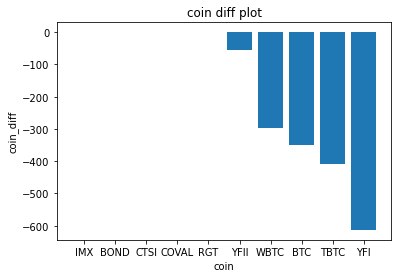

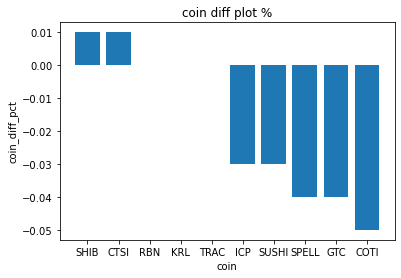

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/lucaschang/Documents/ETL/coin_price_etl/result/base.csv')

df['datetime'] = pd.to_datetime(df['datetime'])

tail1 = df.groupby(['coin_name']).tail(1).reset_index()
tail2 = df.groupby(['coin_name']).nth(1).reset_index()

df3= pd.concat([tail1.reset_index(drop=True),
                tail2.reset_index(drop = True)],
                axis = 0)


tail = df.groupby(['coin_name']).tail(2).reset_index()
tail = tail.sort_values(by=['datetime', 'coin_name'])

df4 = []
for i in tail['coin_name'].unique():
    test = tail[tail['coin_name'] == i]['coin_price'] 
    diff = test.iloc[1]-test.iloc[0]
    diff_pct = (test.iloc[1]-test.iloc[0])/test.iloc[0]
    diff = "%0.2f" % diff
    diff_pct ="%0.2f" % diff_pct
    #print(i,diff)
    tup = (i,diff,diff_pct)
    df4.append(tup)

diff = pd.DataFrame (df4, columns = ['coin_name','coin_diff','coin_diff_pct'])
diff['coin_diff']= diff['coin_diff'].astype('str').astype('float')
diff['coin_diff_pct']= diff['coin_diff_pct'].astype('str').astype('float')

print(diff.info())

diff_desc = diff.sort_values(by=['coin_diff'], ascending=False)

# output the diff table 
diff.to_csv('/Users/lucaschang/Documents/ETL/coin_price_etl/result/coin_diff.csv',index=False)

top_tail_diff = pd.concat([diff_desc.head(5), diff_desc.tail(5)], ignore_index=True)

# ploting
coin = top_tail_diff['coin_name']
coin_diff = top_tail_diff['coin_diff']
fig2 = plt.figure()
x = np.arange(len(coin))
plt.bar(x,coin_diff)
plt.xticks(x, coin) # 刻度
plt.xlabel('coin')
plt.ylabel('coin_diff')
plt.title('coin diff plot')
plt.show()
fig2.savefig('/Users/lucaschang/Documents/ETL/coin_price_etl/result/coin_diff.png')

diff_desc_pct = diff.sort_values(by=['coin_diff_pct'], ascending=False)
top_tail_diff_pct = pd.concat([diff_desc_pct.head(5), diff_desc_pct.tail(5)], ignore_index=True)

# plotting
coin = top_tail_diff_pct['coin_name']
coin_diff_pct = top_tail_diff_pct['coin_diff_pct']
fig3 = plt.figure()
x = np.arange(len(coin))
plt.bar(x,coin_diff_pct)
plt.xticks(x, coin)
plt.xlabel('coin')
plt.ylabel('coin_diff_pct')
plt.title('coin diff plot %')
plt.show()
fig3.savefig('/Users/lucaschang/Documents/ETL/coin_price_etl/result/coin_diff_pct.png')

## function 4. insert data into mysql database

In [1]:
import pandas as pd 
df = pd.read_csv('/Users/lucaschang/Documents/ETL/coin_price_etl/result/base.csv')
df.info()
# df['datetime'] = pd.to_datetime(df['datetime'])
df.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2397 entries, 0 to 2396
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    2397 non-null   object 
 1   coin_name   2397 non-null   object 
 2   coin_price  2397 non-null   float64
dtypes: float64(1), object(2)
memory usage: 56.3+ KB


,datetime,coin_name,coin_price
0,2021-12-23 00:00:04,UNI,15.473037
1,2021-12-23 00:00:04,GYEN,0.008734
2,2021-12-23 00:00:04,BLZ,0.293200
3,2021-12-23 00:00:04,BICO,3.665000
4,2021-12-23 00:00:04,FIL,36.008796
...,...,...,...
95,2021-12-23 00:00:04,JASMY,0.091644
96,2021-12-23 00:00:04,SUKU,0.525950
97,2021-12-23 00:00:04,WBTC,49100.294867
98,2021-12-23 00:00:04,CGLD,4.632915


In [2]:
#pip install mysql-connector-python
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="zzzaaa999",
  database="crawler_db"
)

mycursor = mydb.cursor()

mycursor.execute("CREATE TABLE coin_price (datetime datetime, coin_name VARCHAR(255), coin_price int)")

In [3]:
# put tuples in list
print(df.info())
#df['datetime'] = df['datetime'].astype('str')
#df['coin_price'] = df['coin_price'].astype('str')
df['coin_price'] = df['coin_price'].astype('object')
print(df.info())

records = df.to_records(index=False)
result = list(records)
print(result[0:10])


#d = df['datetime'].strftime("%Y-%m-%d, %H:%M:%S")
#print("Output 2:", d)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2397 entries, 0 to 2396
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    2397 non-null   object 
 1   coin_name   2397 non-null   object 
 2   coin_price  2397 non-null   float64
dtypes: float64(1), object(2)
memory usage: 56.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2397 entries, 0 to 2396
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   datetime    2397 non-null   object
 1   coin_name   2397 non-null   object
 2   coin_price  2397 non-null   object
dtypes: object(3)
memory usage: 56.3+ KB
None
[('2021-12-23 00:00:04', 'UNI', 15.473037133290026), ('2021-12-23 00:00:04', 'GYEN', 0.008734069668649105), ('2021-12-23 00:00:04', 'BLZ', 0.2932), ('2021-12-23 00:00:04', 'BICO', 3.665), ('2021-12-23 00:00:04', 'FIL', 36.0087960417812), ('2021-12-23 00:00:04', 'BAT', 1.20902893

### test insert one record

In [4]:
#insert data into mysql db
mySql_insert_query = """INSERT INTO coin_price (datetime,coin_name,coin_price) VALUES (%s, %s, %s) """

mycursor.executemany(mySql_insert_query, result)

mydb.commit()

print(mycursor.rowcount, "record inserted.")

2397 record inserted.


In [6]:
#query data from mysql db
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="zzzaaa999",
  database="crawler_db"
)

mycursor = mydb.cursor()

mycursor.execute("select * from coin_price")

mydb.close()



## function5 : push png and data into linebot

In [34]:
import requests
from urllib.request import urlopen

string = "testing"
headers = {
        "Authorization":
        "Bearer " + "F2Gwkz5zGslMQeluURPLhzAH30P8Al7j81ybPGAEFdK",
        "Content-Type": "application/x-www-form-urlencoded"
    }

url = 'https://i.stack.imgur.com/GJmBb.png'
params = {"message": string}
files = {'imageFile':urlopen(url).read()}
# open(r'/Users/lucaschang/Documents/ETL/coin_price_etl/result/coin_diff_pct.png', 'rb')}

r = requests.post("https://notify-api.line.me/api/notify",
                      headers=headers,
                      params=params,
                      files=files)

print(r.status_code)


200


In [30]:
pic = open(r'/Users/lucaschang/Documents/ETL/coin_price_etl/result/coin_diff_pct.png', 'rb')
pic

<_io.BufferedReader name='/Users/lucaschang/Documents/ETL/coin_price_etl/result/coin_diff_pct.png'>

In [39]:
#分享鐵人幫的文+貼圖+縮圖程式
import requests
from bs4 import BeautifulSoup as bs 

def lineNotifyMessage(token, msg, img):

    headers = {
        "Authorization":
        "Bearer " + "F2Gwkz5zGslMQeluURPLhzAH30P8Al7j81ybPGAEFdK",
        "Content-Type": "application/x-www-form-urlencoded"
    }

    payload = {
        'message': msg,
        'imageThumbnail' : img, #imageThumbnail、imageFullsize為成對的圖片，各有尺寸大小
        'imageFullsize' : img,
        'stickerPackageId' : 2, #stickerPackageId、stickerId為貼圖成對的編號，參閱Line Sticker List
        'stickerId' : 520
    }
    r = requests.post("https://notify-api.line.me/api/notify", headers = headers, params = payload)
    return r.status_code

if __name__ == "__main__":
  token = '你的權杖內容'
  message = '大賢者【告】今日網友梗圖Top1'
  img = '/Users/lucaschang/Documents/ETL/coin_price_etl/result/coin_diff_pct.png'

  lineNotifyMessage(token, message, img)